
The double moving average strategy is a trading approach employing two moving averages based on a security's price - a short-term and a long-term one. It operates by identifying potential buy and sell signals. A buy signal occurs when the short-term moving average surpasses the long-term moving average, signifying an upward momentum. Conversely, a sell signal emerges when the short-term moving average falls below the long-term moving average, indicating a potential downturn. This strategy capitalizes on the premise that short-term price shifts are often erratic, while long-term price trends display more predictable behavior. The primary objective is to capture both short-term fluctuations and long-term trends in prices, aiming to benefit from these distinct market movements.

In [55]:
# import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

In [56]:
# get a list of tickers in the Nasdaq  
nasdaq = 'https://en.wikipedia.org/wiki/Nasdaq-100#Components'
data_table = pd.read_html(nasdaq)
data_table[4]

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Align Technology,ALGN,Health Care,Health Care Supplies
4,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


In [57]:
# convert the column into a list to generate a list of tickers
tickers = data_table[4]['Ticker'].tolist() 
tickers

['ADBE',
 'ADP',
 'ABNB',
 'ALGN',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CHTR',
 'CTAS',
 'CSCO',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'EBAY',
 'EA',
 'ENPH',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'JD',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LCID',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROST',
 'SGEN',
 'SIRI',
 'SBUX',
 'SNPS',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBA',
 'WBD',
 'WDAY',
 'XEL',
 'ZM',
 'ZS']

### For period 01/07/2018 – 30/06/2023

In [58]:
# feed tickers into a yfinance download over the past 2 years
training_period = ('2018-07-01', '2023-06-30')
nasdaq_download = yf.download(tickers, start = training_period[0], end = training_period[1])['Adj Close'] 

[*********************100%%**********************]  101 of 101 completed


In [59]:
nasdaq_prices = nasdaq_download
nasdaq_prices

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-02,44.660515,NaN,243.259995,87.108963,120.948914,131.899994,58.559006,340.279999,42.799240,15.160000,...,9.420000,94.620560,104.814232,169.610001,49.315125,27.420000,124.260002,39.836689,NaN,37.080002
2018-07-03,43.882687,NaN,242.009995,85.480934,119.872688,131.600006,58.935188,338.679993,41.974743,15.000000,...,9.100000,93.479012,104.426498,167.729996,49.016632,27.360001,123.739998,39.853916,NaN,36.430000
2018-07-05,44.235821,NaN,244.179993,87.190376,119.917519,132.800003,59.461830,341.380005,42.574371,15.500000,...,9.277000,95.710609,105.909569,169.490005,50.323536,27.639999,126.389999,40.146896,NaN,36.669998
2018-07-06,44.849003,NaN,248.190002,87.913956,120.374908,135.110001,59.821301,347.470001,43.220863,16.360001,...,9.400000,96.740608,107.189102,173.449997,51.065723,27.870001,128.750000,40.465729,NaN,38.009998
2018-07-09,45.471741,NaN,249.770004,87.895844,120.643990,134.970001,57.572563,348.970001,43.586273,16.610001,...,9.455000,96.208443,108.148750,174.160004,51.412605,28.299999,129.100006,38.914661,NaN,39.869999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.428238,124.730003,484.720001,185.060318,212.765320,202.000000,82.632576,328.829987,135.775497,110.010002,...,76.239998,164.997589,224.039368,347.000000,30.845064,11.790000,222.250000,61.544487,66.620003,142.699997
2023-06-26,185.020157,123.129997,479.510010,185.458420,214.466797,200.779999,82.919601,331.459991,139.497421,107.510002,...,75.230003,166.050476,222.691223,347.450012,31.031708,11.780000,219.940002,62.297688,66.620003,141.710007
2023-06-27,187.806381,127.889999,489.269989,191.469849,214.536469,206.850006,82.583092,340.690002,146.232819,110.389999,...,76.769997,173.489532,224.318985,347.119995,28.133842,12.270000,224.220001,61.881443,68.050003,144.660004


In [60]:
# identify null values and drop them
nasdaq_prices.loc[:, nasdaq_prices.isna().any()]
nasdaq_prices.dropna(axis=1, inplace=True)

In [61]:
nasdaq_prices

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,TSLA,TTD,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2018-07-02,44.660515,243.259995,87.108963,120.948914,131.899994,58.559006,340.279999,42.799240,15.160000,158.088058,...,22.337999,9.420000,94.620560,104.814232,169.610001,49.315125,27.420000,124.260002,39.836689,37.080002
2018-07-03,43.882687,242.009995,85.480934,119.872688,131.600006,58.935188,338.679993,41.974743,15.000000,158.446426,...,20.724001,9.100000,93.479012,104.426498,167.729996,49.016632,27.360001,123.739998,39.853916,36.430000
2018-07-05,44.235821,244.179993,87.190376,119.917519,132.800003,59.461830,341.380005,42.574371,15.500000,159.854187,...,20.610666,9.277000,95.710609,105.909569,169.490005,50.323536,27.639999,126.389999,40.146896,36.669998
2018-07-06,44.849003,248.190002,87.913956,120.374908,135.110001,59.821301,347.470001,43.220863,16.360001,162.968338,...,20.593332,9.400000,96.740608,107.189102,173.449997,51.065723,27.870001,128.750000,40.465729,38.009998
2018-07-09,45.471741,249.770004,87.895844,120.643990,134.970001,57.572563,348.970001,43.586273,16.610001,165.664444,...,21.233999,9.455000,96.208443,108.148750,174.160004,51.412605,28.299999,129.100006,38.914661,39.869999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,186.428238,484.720001,185.060318,212.765320,202.000000,82.632576,328.829987,135.775497,110.010002,225.284683,...,256.600006,76.239998,164.997589,224.039368,347.000000,30.845064,11.790000,222.250000,61.544487,142.699997
2023-06-26,185.020157,479.510010,185.458420,214.466797,200.779999,82.919601,331.459991,139.497421,107.510002,222.923813,...,241.050003,75.230003,166.050476,222.691223,347.450012,31.031708,11.780000,219.940002,62.297688,141.710007
2023-06-27,187.806381,489.269989,191.469849,214.536469,206.850006,82.583092,340.690002,146.232819,110.389999,220.820847,...,250.210007,76.769997,173.489532,224.318985,347.119995,28.133842,12.270000,224.220001,61.881443,144.660004


In [62]:
# Define the moving average periods
short_ma_period = 50
long_ma_period = 200

In [63]:
# Creates a new column and sets it to the closing price
nasdaq_prices['Close'] = nasdaq_prices.iloc[:, -1]

In [64]:
# Calculate the moving averages
nasdaq_prices['Short MA'] = nasdaq_prices['Close'].rolling(short_ma_period).mean()
nasdaq_prices['Long MA'] = nasdaq_prices['Close'].rolling(long_ma_period).mean()

In [65]:
# Create a new column for the buy/sell signals
nasdaq_prices['Signal'] = 0

In [66]:
# Loop through data and apply Genville's 8 Rules of Moving Average
for i in range(1, len(nasdaq_prices)):
    # Rule 1: If the short MA crosses above the long MA, buy
    if nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] <= nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = 1
    # Rule 2: If the short MA crosses below the long MA, sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] >= nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = -1
    # Rule 3: If the short MA is above the long MA, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i]:
        nasdaq_prices['Signal'][i] = 1
    # Rule 4: If the short MA is below the long MA, hold or sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i]:
        nasdaq_prices['Signal'][i] = -1
    # Rule 5: If the short MA and long MA are flat, hold
    elif nasdaq_prices['Short MA'][i] == nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = 0
    # Rule 6: If the short MA is rising and the long MA is flat, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = 1
    # Rule 7: If the short MA is falling and the long MA is flat, hold or sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = -1
    # Rule 8: If the short MA and long MA are rising, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] > nasdaq_prices['Long MA'][i-1]:
        nasdaq_prices['Signal'][i] = 1

/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/2088959669.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] <= nasdaq_prices['Long MA'][i-1]:
/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/2088959669.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] >= nasdaq_prices['Long MA'][i-1]:
/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/2088959669.py:10: FutureWarning: Series.__

In [67]:
# Calculate the returns for each signal
nasdaq_prices['Returns'] = nasdaq_prices['Close'].pct_change() * nasdaq_prices['Signal'].shift(1)

In [68]:
# Calculate the total return for the strategy
total_return = (nasdaq_prices['Returns'] + 1).cumprod()[-1] - 1

/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/2874195993.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = (nasdaq_prices['Returns'] + 1).cumprod()[-1] - 1


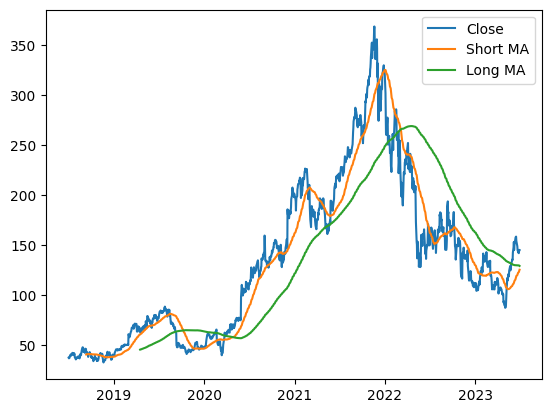

In [69]:
# Plot the historical performance
plt.plot(nasdaq_prices['Close'])
plt.plot(nasdaq_prices['Short MA'])
plt.plot(nasdaq_prices['Long MA'])
plt.legend(['Close', 'Short MA', 'Long MA'])
plt.show()

In [70]:
# Define the transaction fee
transaction_fee = 0.001

# Create a new dataframe to store the trading results
trading_results = pd.DataFrame(index=nasdaq_prices.index, columns=['Position', 'Trade', 'Transaction Fee', 'Net Return', 'Cumulative Return'])

# Initialize the trading results
trading_results.iloc[0]['Position'] = 0
trading_results.iloc[0]['Trade'] = 0
trading_results.iloc[0]['Transaction Fee'] = 0
trading_results.iloc[0]['Net Return'] = 0
trading_results.iloc[0]['Cumulative Return'] = 0

# Loop through the data to generate trading results
for i in range(1, len(nasdaq_prices)):
    # Rule 1: If the short MA crosses above the long MA, buy
    if nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] <= nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = 1
        trading_results.iloc[i]['Trade'] = nasdaq_prices['Close'][i]
        trading_results.iloc[i]['Transaction Fee'] = nasdaq_prices['Close'][i] * transaction_fee
        trading_results.iloc[i]['Net Return'] = 0
    # Rule 2: If the short MA crosses below the long MA, sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] >= nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = -1
        trading_results.iloc[i]['Trade'] = nasdaq_prices['Close'][i]
        trading_results.iloc[i]['Transaction Fee'] = nasdaq_prices['Close'][i] * transaction_fee
        trading_results.iloc[i]['Net Return'] = 0
    # Rule 3: If the short MA is above the long MA, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i]:
        trading_results.iloc[i]['Position'] = 1
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee
    # Rule 4: If the short MA is below the long MA, hold or sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i]:
        trading_results.iloc[i]['Position'] = -1
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee
    # Rule 5: If the short MA and long MA are flat, hold
    elif nasdaq_prices['Short MA'][i] == nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = trading_results.iloc[i-1]['Position']
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee
    # Rule 6: If the short MA is rising and the long MA is flat, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = 1
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee
    # Rule 7: If the short MA is falling and the long MA is flat, hold or sell
    elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] == nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = -1
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee
    # Rule 8: If the short MA and long MA are rising, hold or buy
    elif nasdaq_prices['Short MA'][i] > nasdaq_prices['Short MA'][i-1] and nasdaq_prices['Long MA'][i] > nasdaq_prices['Long MA'][i-1]:
        trading_results.iloc[i]['Position'] = 1
        trading_results.iloc[i]['Trade'] = 0
        trading_results.iloc[i]['Transaction Fee'] = 0
        trading_results.iloc[i]['Net Return'] = nasdaq_prices['Returns'][i] - transaction_fee

    # Calculate the cumulative return
    trading_results.iloc[i]['Cumulative Return'] = (trading_results.iloc[i]['Net Return'] + 1) * (trading_results.iloc[i-1]['Cumulative Return'] + 1) - 1

# Print the trading results
print(trading_results)

           Position Trade Transaction Fee Net Return Cumulative Return
Date                                                                  
2018-07-02        0     0               0          0                 0
2018-07-03      NaN   NaN             NaN        NaN               NaN
2018-07-05      NaN   NaN             NaN        NaN               NaN
2018-07-06      NaN   NaN             NaN        NaN               NaN
2018-07-09      NaN   NaN             NaN        NaN               NaN
...             ...   ...             ...        ...               ...
2023-06-23       -1     0               0   0.013775               NaN
2023-06-26       -1     0               0   0.005938               NaN
2023-06-27       -1     0               0  -0.021817               NaN
2023-06-28       -1     0               0   0.002802               NaN
2023-06-29       -1     0               0  -0.006066               NaN

[1257 rows x 5 columns]


/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/670561597.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if nasdaq_prices['Short MA'][i] > nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] <= nasdaq_prices['Long MA'][i-1]:
/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/670561597.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif nasdaq_prices['Short MA'][i] < nasdaq_prices['Long MA'][i] and nasdaq_prices['Short MA'][i-1] >= nasdaq_prices['Long MA'][i-1]:
/var/folders/7c/2bhf4z412c1cw_rv21znw3dr0000gn/T/ipykernel_4576/670561597.py:29: FutureWarning: Series.__g

### For period 01/01/2020 – 30/06/2023